## Training Dataset
Author: Aniruddha Jana

In [2]:
import pandas as pd
import numpy as np

### Reading Dataset

In [4]:
train = pd.read_csv(r'C:\Users\innov\OneDrive\Desktop\DSP Project\Dataset\Training\training16m.csv',encoding="Latin-1" ,names=["polarity","id", "date","query", "user", "tweet"])
reddit = pd.read_csv(r'C:\Users\innov\OneDrive\Desktop\DSP Project\Dataset\Training\Reddit_data.csv')
tweet1 = pd.read_csv(r'C:\Users\innov\OneDrive\Desktop\DSP Project\Dataset\Training\Twitter_data.csv')
tweet2 = pd.read_csv(r'C:\Users\innov\OneDrive\Desktop\DSP Project\Dataset\Training\Tweets.csv')

In [5]:
train.head()

,polarity,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
reddit.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [7]:
tweet1.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
tweet2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Removing Extra columns

In [9]:
train = train[["tweet","polarity"]]
tweet2 = tweet2[["text","airline_sentiment"]]

### Replacing Columns

In [12]:
train.columns = ["text","polarity"]
tweet1.columns = ["text","polarity"]
tweet2.columns = ["text","polarity"]
reddit.columns = ["text","polarity"]

### Replcaing polarity values

In [15]:
train["polarity"] = train["polarity"].replace(4,1)
train["polarity"] = train["polarity"].replace(0,-1)
train["polarity"] = train["polarity"].replace(2,0)

tweet2["polarity"] = tweet2["polarity"].replace("negative",-1)
tweet2["polarity"] = tweet2["polarity"].replace("neutral",0)
tweet2["polarity"] = tweet2["polarity"].replace("positive",1)

### Shape of datasets before removing Null values

In [16]:
print(train.shape, tweet1.shape, tweet2.shape, reddit.shape)

(1600000, 2) (162980, 2) (14640, 2) (37249, 2)


In [17]:
train.dropna(inplace = True)
reddit.dropna(inplace = True)
tweet1.dropna(inplace = True)
tweet2.dropna(inplace = True)

### Shape of datasets after removing Null values

In [18]:
print(train.shape, tweet1.shape, tweet2.shape, reddit.shape)

(1600000, 2) (162969, 2) (14640, 2) (37149, 2)


## Creating final dataset for Training

In [19]:
dfx = pd.concat([train, tweet1, tweet2, reddit], axis = 0)

In [23]:
dfx = dfx.sample(frac = 1).reset_index()

In [27]:
dfx = dfx.drop(["index"],axis=1)

In [28]:
dfx.head()

,text,polarity
0,@SVW0015 welcome to twitter!,1.0
1,broke my camera,-1.0
2,back to work for the first time in a month... ...,-1.0
3,Wow. A past thought greeted me with such inten...,-1.0
4,and again.. always remember to follow @Disney_...,1.0


#### Visualising the distribution of Polarity in final dataset

<AxesSubplot:xlabel='polarity', ylabel='count'>

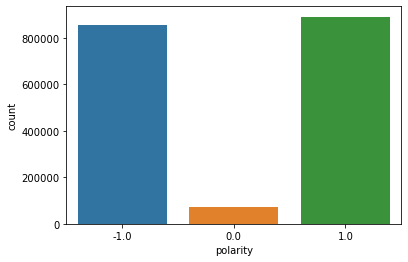

In [29]:
import seaborn as sns
sns.countplot(data = dfx , x = "polarity")

#### More than 18 lakhs input texts in final dataset!!!

In [31]:
dfx.shape

(1814758, 2)

#### Saving the final dataset

In [30]:
dfx.to_csv(r'C:\Users\innov\OneDrive\Desktop\DSP Project\Dataset\Training\train.csv',index = False)